W tym notatniku Jupyter skupimy się na podstawowej analizie danych pod kątem budowy modeli sztucznej inteligencji oraz budowaniu różnych modeli, służących do dwóch różnych problemów, które określimy poniżej

In [1]:
#importowanie potrzebnych bibliotek do analizy i budowy modelu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


In [2]:
#przedstawienie danych w postaci dataframe
dataframe = pd.read_csv('SalmonandSeaTroutNets1952-2022.csv')
dataframe.head(10)

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
5,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,April,4.0,4253.0,16522.1,...,5.4,1244.0,1413.4,0.0,0.0,0.0,0.0,0.0,0.0,31.0
6,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,May,5.0,754.0,3310.3,...,23.1,60.0,104.3,0.0,0.0,0.0,0.0,0.0,0.0,28.0
7,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,May,5.0,2370.0,9800.8,...,49.9,2689.0,3519.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
8,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,June,6.0,461.0,2190.9,...,427.7,80.0,126.1,0.0,0.0,0.0,0.0,0.0,0.0,29.0
9,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,June,6.0,2157.0,9948.6,...,2695.2,7286.0,11079.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0


In [3]:
#wyświetlenie informacji o danych
print(dataframe.info())
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [4]:
#sprawdzmy czy występują braki danych
dataframe.isnull().sum()

District                  3
District ID               3
Report order              3
Region                    3
Method                    3
Year                      3
Month                     3
Month number              3
Wild MSW number           3
Wild MSW weight (kg)      3
Wild 1SW number           3
Wild 1SW weight (kg)      3
Sea trout number          3
Sea trout weight (kg)     3
Finnock number            3
Finnock weight (kg)       3
Farmed MSW number         3
Farmed MSW weight (kg)    3
Farmed 1SW number         3
Farmed 1SW weight (kg)    3
Netting effort            3
dtype: int64

In [5]:
#usuwamy wiersze z pustymi danymi (3) - jest ich bardzo mało więc nie wpłynie to znacząco na wynik modeli 
dataframe = dataframe.dropna()
dataframe.isnull().values.any() #widzimy, że nie ma już pustych danych

False

Warto teraz określić problem, który będziemy poruszać jako pierwszy. Spróbujmy zbudować modele, które będą klasyfikować region, w którym była złapana ryba. Następnie porównamy ich wyniki i zobaczymy, który poradził sobie najlepiej.

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64


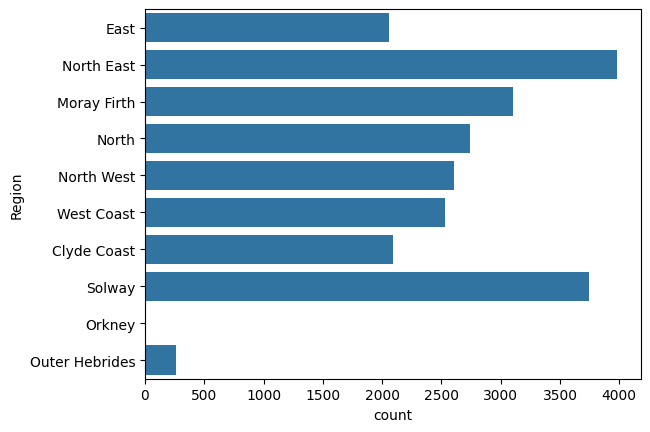

In [6]:
#sprawdzmy jak wygląda rozkład danych w poszczegolnych regionach
sns.countplot(dataframe['Region'])
#po bardziej szczegółowe liczby możemy użyć tej funkcji
print(dataframe['Region'].value_counts())

In [7]:
#z racji na bardzo małą próbkę danych z regionu "Orkney", usuniemy te dane z naszego zbioru
dataframe = dataframe[dataframe.Region != 'Orkney']
print(dataframe['Region'].value_counts())

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Name: count, dtype: int64


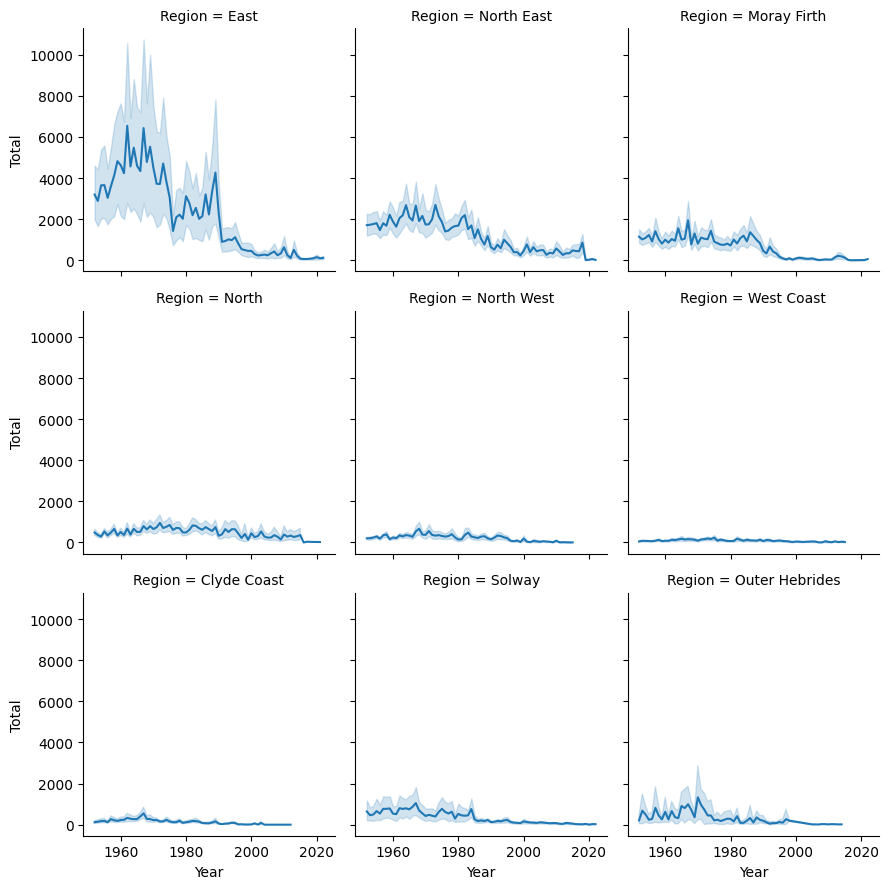

In [8]:
#Możemy jeszcze zobaczyć jak wygląda ilość łowionych ryb w poszczególnych latach w każdym regionie, do tego musimy dodać jeszcze jedną kolumnę, sumującą ilość ryb
dataframe['Total'] = dataframe['Wild 1SW number'] + dataframe['Wild MSW number'] + dataframe['Sea trout number'] + dataframe['Finnock number'] + dataframe['Farmed 1SW number'] + dataframe['Farmed MSW number']
plot = sns.FacetGrid(dataframe, col='Region', col_wrap=3)
plot.map(sns.lineplot, 'Year', 'Total')


Zanim przystąpimy do dalszej analizy powinniśmy przystosować do niej nasze dane, transformując je na dane liczbowe

In [9]:
#transforamcja danych kategorycznych na dane numeryczne
# dataframe = pd.get_dummies(dataframe, columns=['District','Region', 'Month', 'Method'], drop_first=True)
# dataframe.head()
from sklearn.preprocessing import LabelEncoder

dataframe['District'] = LabelEncoder().fit_transform(dataframe['District'])
dataframe['Region'] = LabelEncoder().fit_transform(dataframe['Region'])
dataframe['Month'] = LabelEncoder().fit_transform(dataframe['Month'])
dataframe['Method'] = LabelEncoder().fit_transform(dataframe['Method'])

dataframe.head()




,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort,Total
0,90,101.0,1.0,1,1,1952.0,2,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,107.0
1,90,101.0,1.0,1,3,1952.0,2,2.0,6606.0,24856.9,...,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7059.0
2,90,101.0,1.0,1,1,1952.0,5,3.0,185.0,703.1,...,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0,198.0
3,90,101.0,1.0,1,3,1952.0,5,3.0,7008.0,26151.9,...,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7857.0
4,90,101.0,1.0,1,1,1952.0,0,4.0,484.0,1912.3,...,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,498.0


<Axes: >

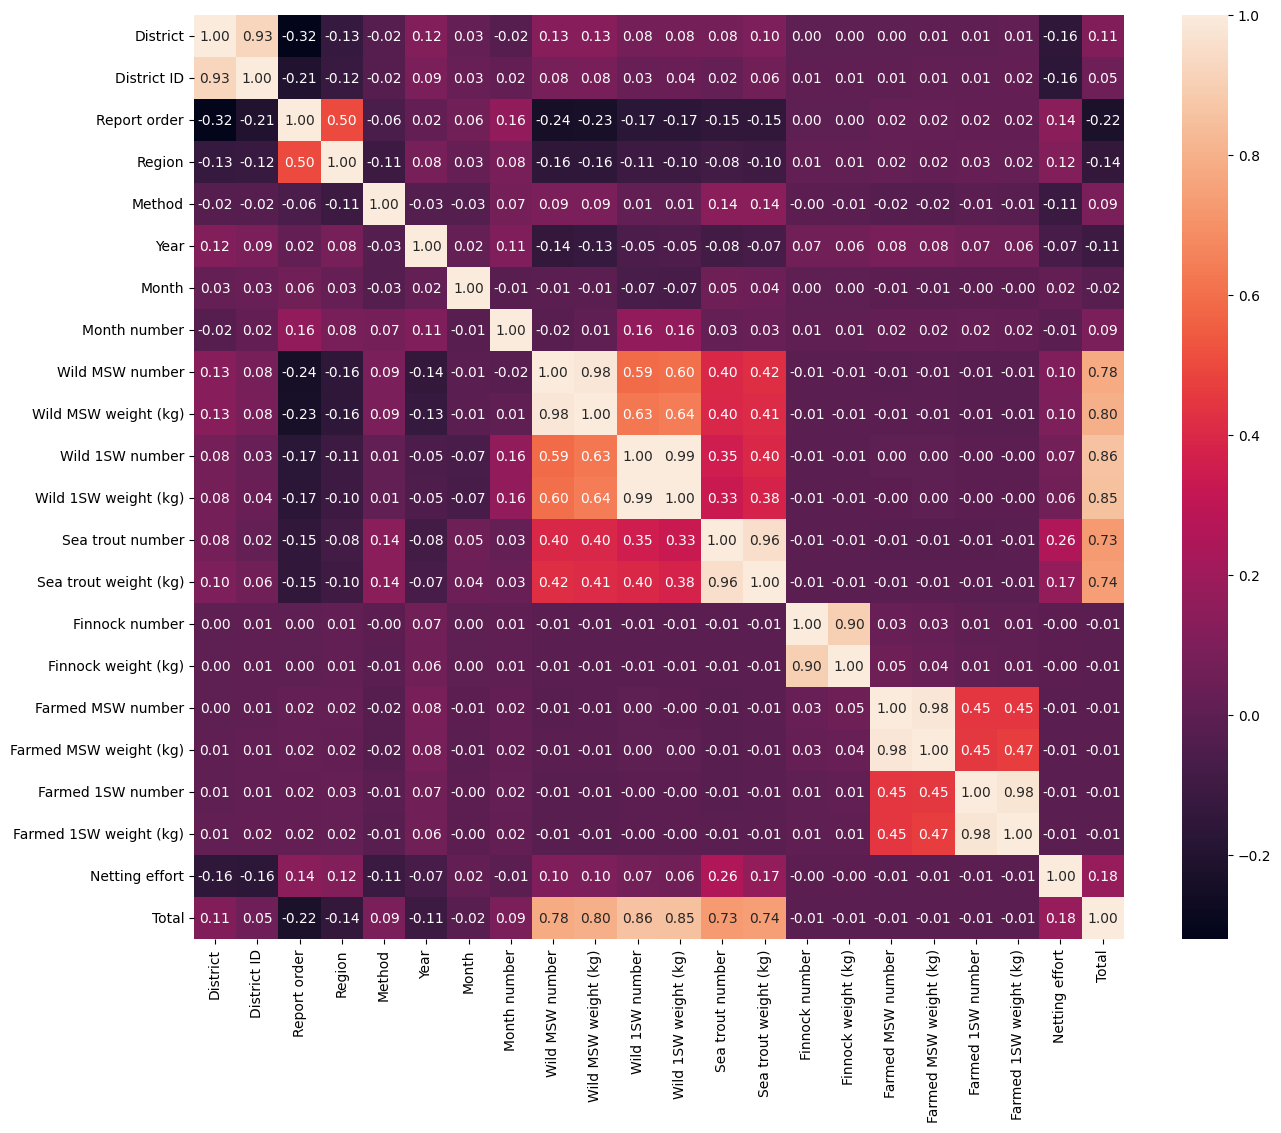

In [10]:
#zobaczmy teraz jak wygląda korelacja między danymi
correlation = dataframe.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".2f")

Po wstępnej analizie danych możemy przystąpić do podziału danych na treningowe, walidacyjne i testowe oraz napisanie funkcji do trenowania modeli

In [11]:
#wydzielenie danych do trenowania i testowania modelu
X = dataframe.drop('Region', axis=1)
Y = dataframe['Region']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#trenowanie modeli

#funkcja trenująca model
def train_model(model, X_train, Y_train, X_test, Y_test):
    print('Training model... ')
    model.fit(X_train, Y_train)
    print('Model trained')

    predictions = model.predict(X_test)

    scores = list(metrics.precision_recall_fscore_support(Y_test, predictions, zero_division=1))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]

    score_vals.append(metrics.accuracy_score(Y_test, predictions))

    return score_vals

In [13]:
#MODEL 1 - regresja logistyczna
#użyliśmy innego solvera niż domyślny, ponieważ domyślny nie działał zbyt dobrze - nasze dane były zbyt skomplikowane dla domyślnego solvera, nawet zwiększając ilość iteracji do prawie miliona, więc użyliśmy solvera 'liblinear', który działał znacznie lepiej
lr_accuracy = train_model(LogisticRegression(solver='liblinear', max_iter=10000), X_train, Y_train, X_test, Y_test)
accuracy_comparison = {'Logistic Regression' : lr_accuracy}
print('Logistic Regression accuracy: ', lr_accuracy)

Training model... 
Model trained
Logistic Regression accuracy:  [0.7159533073929961, 0.423963133640553, 0.5325615050651229, 0.7759291270527225]


In [14]:
#MODEL 2 - las losowy
rf_accuracy = train_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Random Forest'] = rf_accuracy
print('Random Forest accuracy: ', rf_accuracy)
#poniewaz wynik jest perfekcyjny sprawdzmy to metoda cross walidacji
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, Y_train, cv=5)
print("Cross-validated scores:", scores)
#jak widzimy wyniki nadal są świetne, więc najprawdopodobniej dane są zbyt proste dla tego modelu

Training model... 
Model trained
Random Forest accuracy:  [1.0, 1.0, 1.0, 1.0]
Cross-validated scores: [1.         0.99945975 1.         0.99972988 0.99945961]


In [15]:
#MODEL 3 - Support Vector Machine
svc_accuracy = train_model(SVC(kernel='linear'), X_train, Y_train, X_test, Y_test) #użyliśmy kernela liniowego, ponieważ taki bardziej pasuje do naszych danych
accuracy_comparison['Support Vector Machine'] = svc_accuracy
print('Support Vector Machine accuracy: ', svc_accuracy)


Training model... 
Model trained
Support Vector Machine accuracy:  [1.0, 1.0, 1.0, 0.9995678478824547]


In [16]:
#MODEL 4 - Naive Bayes
ng_accuracy = train_model(GaussianNB(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Naive Bayes'] = ng_accuracy
print('Naive Bayes accuracy: ', ng_accuracy)

Training model... 
Model trained
Naive Bayes accuracy:  [0.6357466063348416, 0.6474654377880185, 0.6415525114155252, 0.8083405358686258]


In [17]:
#Model 4 - Sieć neuronowa
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp_accuracy = train_model(mlp, X_train, Y_train, X_test, Y_test)
accuracy_comparison['Neural Network'] = mlp_accuracy
print('Neural Network accuracy: ', mlp_accuracy)

Training model... 
Model trained
Neural Network accuracy:  [0.9414316702819957, 1.0, 0.9698324022346368, 0.9850907519446845]


<Axes: >

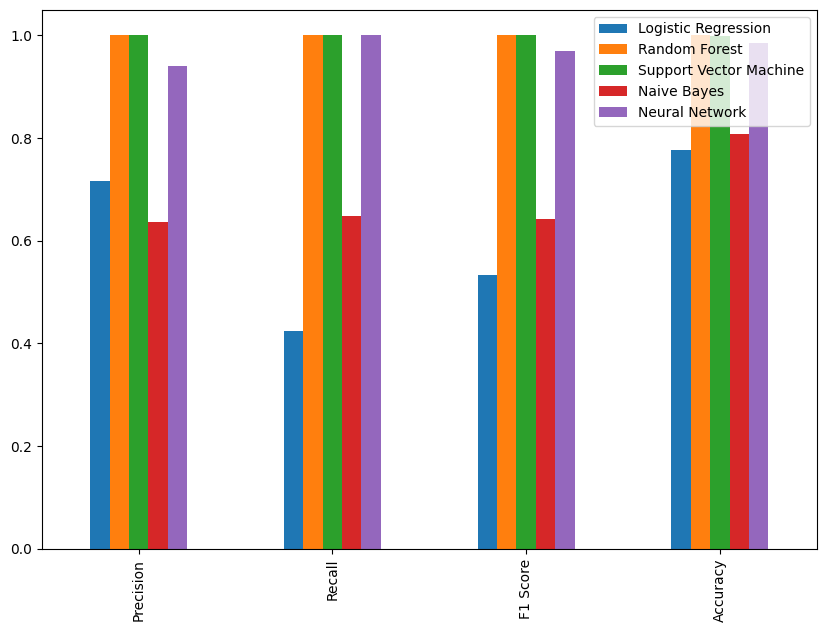

In [18]:
#zwizualizowanie wyników
accuracy_df = pd.DataFrame(accuracy_comparison, index=['Precision', 'Recall', 'F1 Score', 'Accuracy'])
accuracy_df.plot(kind='bar', figsize=(10, 7))

Jak widzimy w naszym problemie najlepiej poradził sobie model używający lasów losowych oraz SVM, który dobrze zaadaptował się do naszych danych które nie są olbrzymie jednak mają całkiem sporą rozległość i dużo relacji między sobą, z którymi regresja logistyczna oraz naiwny klasyfikator Bayesa nie poradziły sobie zbyt dobrze. 
Prosta sieć neuronowa osiągnęła gorsze wyniki niż Random Forest oraz SVM, jednak nadal są one na wysokim poziomie. 

Nasze dane nie są ogromne, dlatego widać że potężniejsze i bardziej skomplikowane algorytmy radzą sobie znacznie lepiej.

Oczywiście przedstawione modele nie są poddane szczegółowemu korygowaniu, jednak chcieliśmy przedstawić kilka modelów w ich podstawowej formie w ramach porównania jak radzą sobie na naszych danych.

Teraz możemy skupić się na drugim problemie. Mając taki wachlarz danych liczbowych żal byłoby nie postawić sobie problemu regresyjnego. Spróbujemy przewidzieć średnią wagę pozyskanej ryby z połowu

In [19]:
#spojrzmy jeszcze raz na nasze dane
dataframe.head(10)


,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort,Total
0,90,101.0,1.0,1,1,1952.0,2,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,107.0
1,90,101.0,1.0,1,3,1952.0,2,2.0,6606.0,24856.9,...,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7059.0
2,90,101.0,1.0,1,1,1952.0,5,3.0,185.0,703.1,...,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0,198.0
3,90,101.0,1.0,1,3,1952.0,5,3.0,7008.0,26151.9,...,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7857.0
4,90,101.0,1.0,1,1,1952.0,0,4.0,484.0,1912.3,...,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,498.0
5,90,101.0,1.0,1,3,1952.0,0,4.0,4253.0,16522.1,...,1244.0,1413.4,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5501.0
6,90,101.0,1.0,1,1,1952.0,6,5.0,754.0,3310.3,...,60.0,104.3,0.0,0.0,0.0,0.0,0.0,0.0,28.0,833.0
7,90,101.0,1.0,1,3,1952.0,6,5.0,2370.0,9800.8,...,2689.0,3519.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,5103.0
8,90,101.0,1.0,1,1,1952.0,4,6.0,461.0,2190.9,...,80.0,126.1,0.0,0.0,0.0,0.0,0.0,0.0,29.0,783.0
9,90,101.0,1.0,1,3,1952.0,4,6.0,2157.0,9948.6,...,7286.0,11079.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,10950.0


W naszym zbiorze danych mamy dużo różnych rodzajów ryb oraz ich określoną ilość. Należałoby do naszej już wcześniej utworzonej kolumny 'Total', która zawiera sumę złowionych ryb w danym okresie, dodać kolejną która byłaby sumą wagi wszystkich złowionych ryb, a następnie dodać jeszcze jedną wyliczającą średnią z dwóch poprzednich

<Axes: xlabel='Year', ylabel='Total weight'>

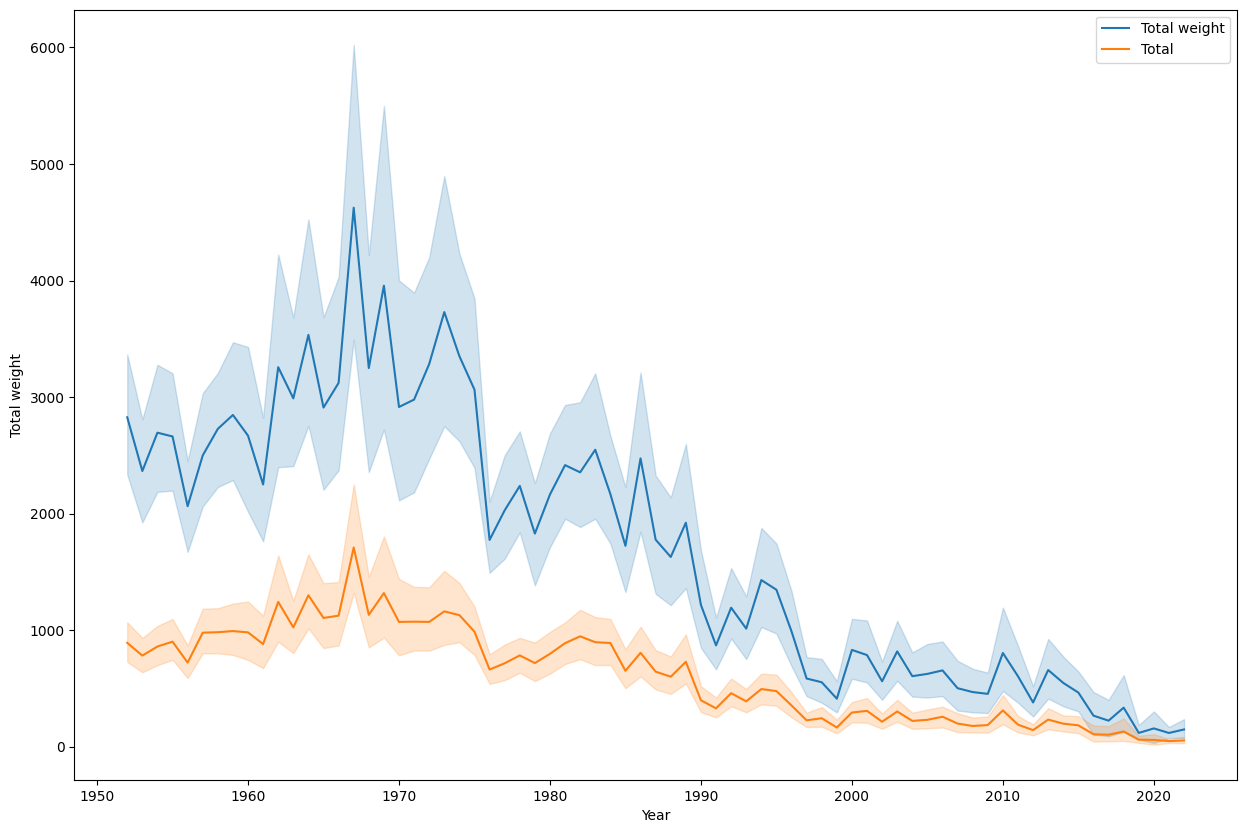

In [20]:
dataframe['Total weight'] = dataframe['Wild 1SW weight (kg)'] + dataframe['Wild MSW weight (kg)'] + dataframe['Sea trout weight (kg)'] + dataframe['Finnock weight (kg)'] + dataframe['Farmed 1SW weight (kg)'] + dataframe['Farmed MSW weight (kg)']
#zobaczmy na wykresie jak się prezentuje zsumowana waga ryb w poszczególnych latach oraz ich ilość
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='Year', y='Total weight', data=dataframe, ax=ax, label='Total weight')
sns.lineplot(x='Year', y='Total', data=dataframe, ax=ax, label='Total')

Jako ciekawostkę można zauważyć spadek masy łowionych ryb, mimo że liczba połowów również się zmniejszyła na przestrzeni lat to spadek masy ryb jest o wiele bardziej znaczący.

<Axes: xlabel='Year', ylabel='Average weight'>

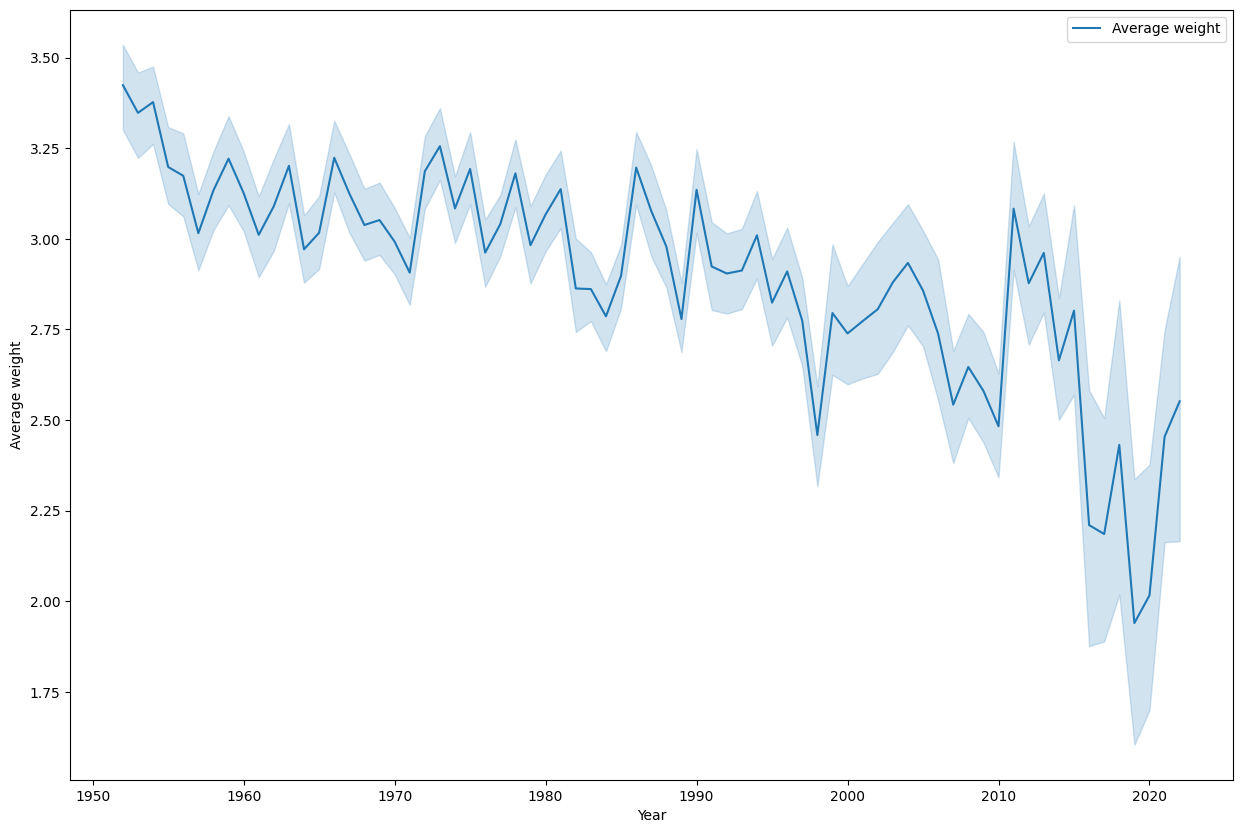

In [21]:
#dodajmy jeszcze kolumnę z średnią wagą pojedyńczej ryby i zaprezentujmy to na wykresie, gdzie już wyraźnie widać, że waga ryb spada
dataframe['Average weight'] = dataframe['Total weight'] / dataframe['Total']
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='Year', y='Average weight', data=dataframe, ax=ax, label='Average weight')

<Axes: >

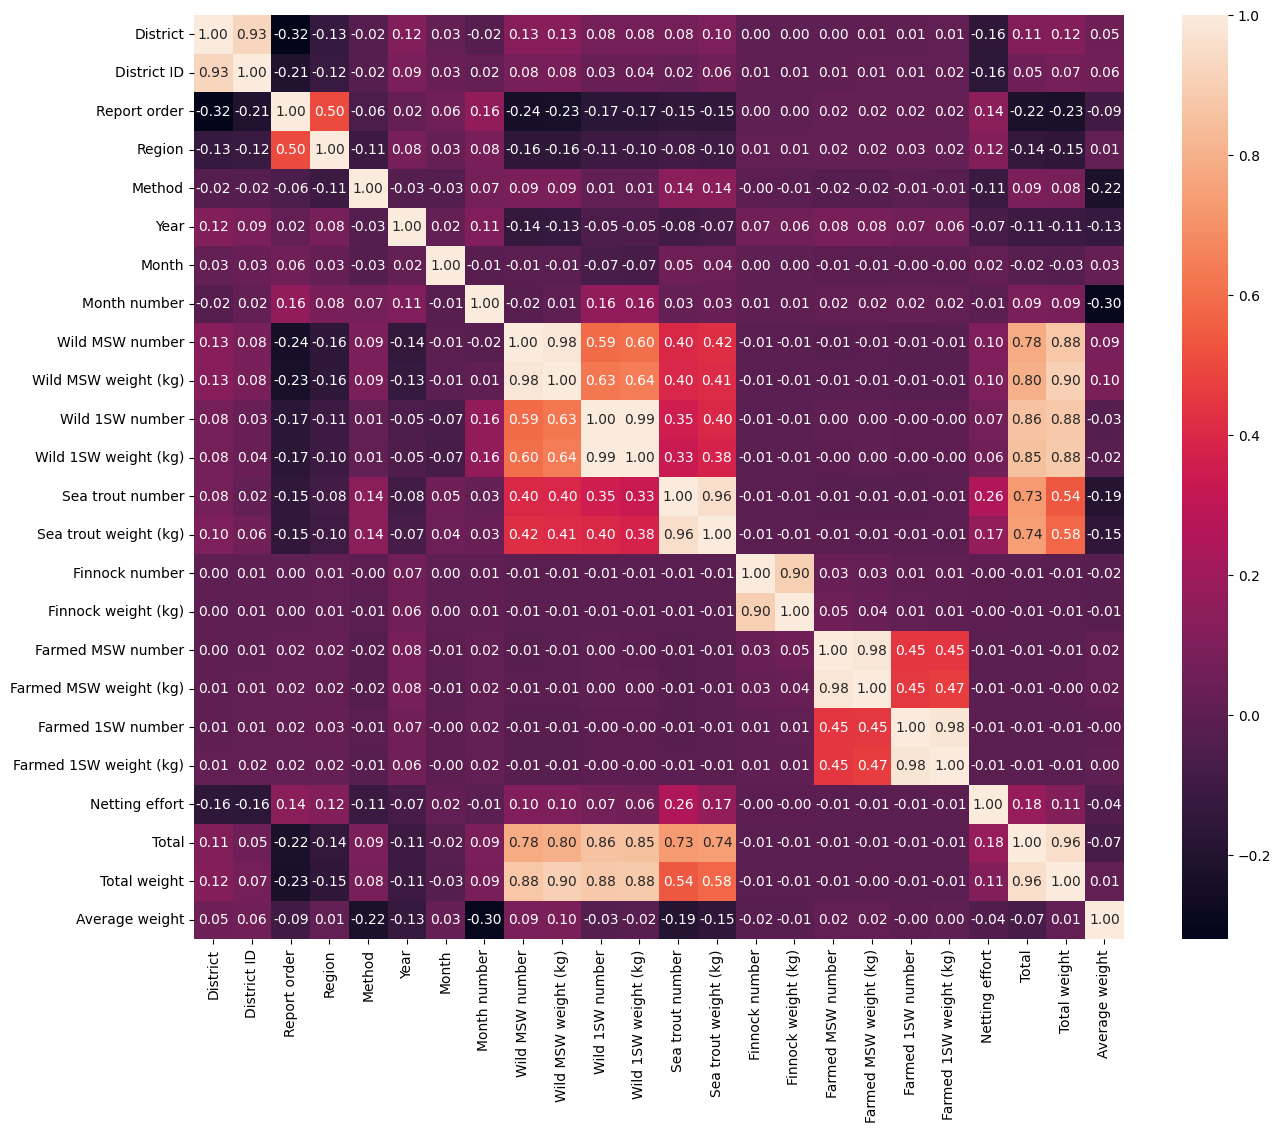

In [22]:
#sprawdźmy jeszcze jak wygląda korelacja między danymi
correlation = dataframe.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".2f")

In [23]:
#sprawdźmy jeszcze raz czy nie ma pustych danych z utworzonych kolumn (gdy np w danym miesiącu nie złowiono żadnej ryby, wtedy po dzieleniu przez 0, waga pojedyńczej ryby wynosi NaN)
dataframe.isnull().sum()

District                     0
District ID                  0
Report order                 0
Region                       0
Method                       0
Year                         0
Month                        0
Month number                 0
Wild MSW number              0
Wild MSW weight (kg)         0
Wild 1SW number              0
Wild 1SW weight (kg)         0
Sea trout number             0
Sea trout weight (kg)        0
Finnock number               0
Finnock weight (kg)          0
Farmed MSW number            0
Farmed MSW weight (kg)       0
Farmed 1SW number            0
Farmed 1SW weight (kg)       0
Netting effort               0
Total                        0
Total weight                 0
Average weight            1249
dtype: int64

In [24]:
#widzimy, że jest dużo pustych danych, więc uzupełnijmy je średnią wagą ryb
dataframe['Average weight'] = dataframe['Average weight'].fillna(dataframe['Average weight'].mean())

In [25]:
#przygotujmy dane do modelu
X = dataframe.drop('Average weight', axis=1)
Y = dataframe['Average weight']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
#napiszemy nową funkcję trenującą model, gdyż będziemy wykorzystywać inne miary oceny modelu
def train_model(model, X_train, Y_train, X_test, Y_test):
    print('Training model... ')
    model.fit(X_train, Y_train)
    print('Model trained')

    predictions = model.predict(X_test)
    #do oceny modelu użyjemy błędu średniokwadratowego, pierwiatka z błędu średniokwadratowego oraz wyniku r2, który pokazuje jak dobrze model przewiduje dane
    mse = metrics.mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(Y_test, predictions)
   

    return [mse, rmse, r2]

In [27]:
#MODEL 1 - regresja liniowa
linr_accuracy = train_model(LinearRegression(), X_train, Y_train, X_test, Y_test)
accuracy_comparison = {'Linear Regression' : linr_accuracy}
print('Linear Regression accuracy: ', linr_accuracy)

Training model... 
Model trained
Linear Regression accuracy:  [0.9254228977452392, 0.9619890320295961, 0.21591691507815947]


In [28]:
#MODEL 2 - Random Forest
rfr_accuracy = train_model(RandomForestRegressor(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Random Forest'] = rfr_accuracy
print('Random Forest accuracy: ', rfr_accuracy)

Training model... 
Model trained
Random Forest accuracy:  [0.08880913179879868, 0.29800861027627823, 0.9247546843722015]


In [29]:
#MODEL 3 - Support Vector Machine
svr_accuracy = train_model(SVR(), X_train, Y_train, X_test, Y_test) #jądro liniowe zabiera zbyt dużo czasu na naukę, więc użyjemy domyślnego jądra
accuracy_comparison['Support Vector Machine'] = svr_accuracy
print('Support Vector Machine accuracy: ', svr_accuracy)


Training model... 
Model trained
Support Vector Machine accuracy:  [0.7534438905711783, 0.8680114576266712, 0.3616295733832221]


In [30]:
#MODEL 4 - Drzewo decyzyjne
dtr_accuracy = train_model(DecisionTreeRegressor(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Decision Tree'] = dtr_accuracy
print('Decision Tree accuracy: ', dtr_accuracy)

Training model... 
Model trained
Decision Tree accuracy:  [0.18985509802903439, 0.43572364869150076, 0.8391414656872644]


In [31]:
#MODEL 5 - Sieć neuronowa
mlpr = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlpr_accuracy = train_model(mlpr, X_train, Y_train, X_test, Y_test)
accuracy_comparison['Neural Network'] = mlpr_accuracy
print('Neural Network accuracy: ', mlpr_accuracy)

Training model... 
Model trained
Neural Network accuracy:  [0.2232309907257407, 0.47247326985316396, 0.8108630721318264]


<Axes: >

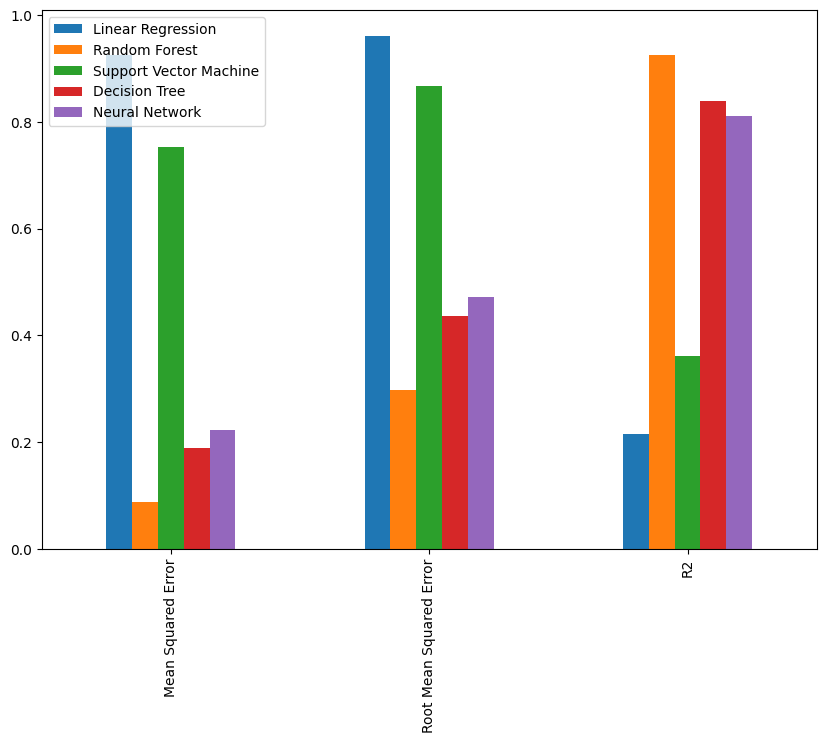

In [32]:
#zwizualizowanie wyników
accuracy_df = pd.DataFrame(accuracy_comparison, index=['Mean Squared Error', 'Root Mean Squared Error', 'R2'])
accuracy_df.plot(kind='bar', figsize=(10, 7))

Jak widzimy w tym problemie wyraźnie widać które modele poradziły sobie lepiej od reszty. Największy procent dopasowania wyników (R2) osiągnęły lasy losowe, a za nimi również dobre wyniki osiągnęły lasy drzewa decyzyjne oraz prosta sieć neuronowa. Widzimy również że regresja liniowa oraz SVM w domyślnej konfiguracji nie poradziły sobie z takim problemem efektywnie osiągając wysoki błąd średniokwadratowy.